In [5]:
from datetime import datetime
from opendrift.models.shipdrift import ShipDrift

o = ShipDrift(loglevel=20)

08:49:30 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6)


08:49:34 WARNING opendrift.models.shipdrift:174: Ratio of draft to length should be in range 0.025 to 0.07, given range is 0.125-0.125. Using border value.
08:49:34 WARNING opendrift.models.shipdrift:181: Ratio of beam to length should be in range 0.12 to 0.18, given range is 0.25-0.25. Using border value.
08:49:34 INFO    opendrift.models.basemodel.environment:220: Adding a dynamical landmask with max. priority based on assumed maximum speed of 2.0 m/s. Adding a customised landmask may be faster...
08:49:34 INFO    opendrift.models.basemodel.environment:247: Fallback values will be used for the following variables which have no readers: 
08:49:34 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
08:49:34 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
08:49:34 INFO    opendrift.models.basemodel.environment:250: 	sea_surface_wave_significant_height: 0.000000
08:49:34 INFO    op

--------------------
Reader performance:
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml
 0:00:43.8  total
 0:00:00.0  preparing
 0:00:43.8  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  rotating vectors
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc
 0:00:40.4  total
 0:00:00.0  preparing
 0:00:40.2  reading
 0:00:00.5  interpolation
 0:00:00.0  interpolation_time
 0:00:00.2  rotating vectors
 0:00:00.0  masking
--------------------
https://thredds.met.no/thredds/dodsC/cmems/mywavewam3km/dataset-wam-arctic-1hr3km-be.ncml
 0:00:38.1  total
 0:00:00.0  preparing
 0:00:37.8  reading
 0:00:00.0  interpolation
 0:00:00.0  interpolation_time
 0:00:00.2  rotating vectors
 0:00:00.0  masking
-----------------

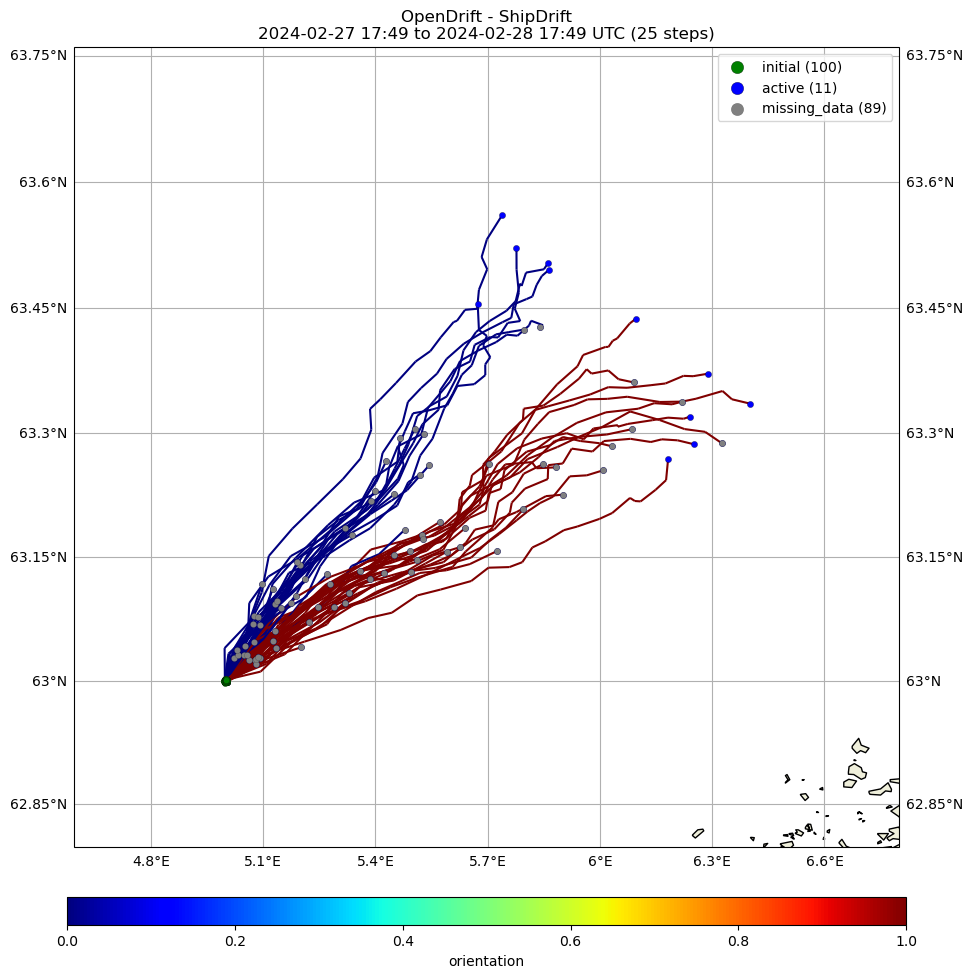

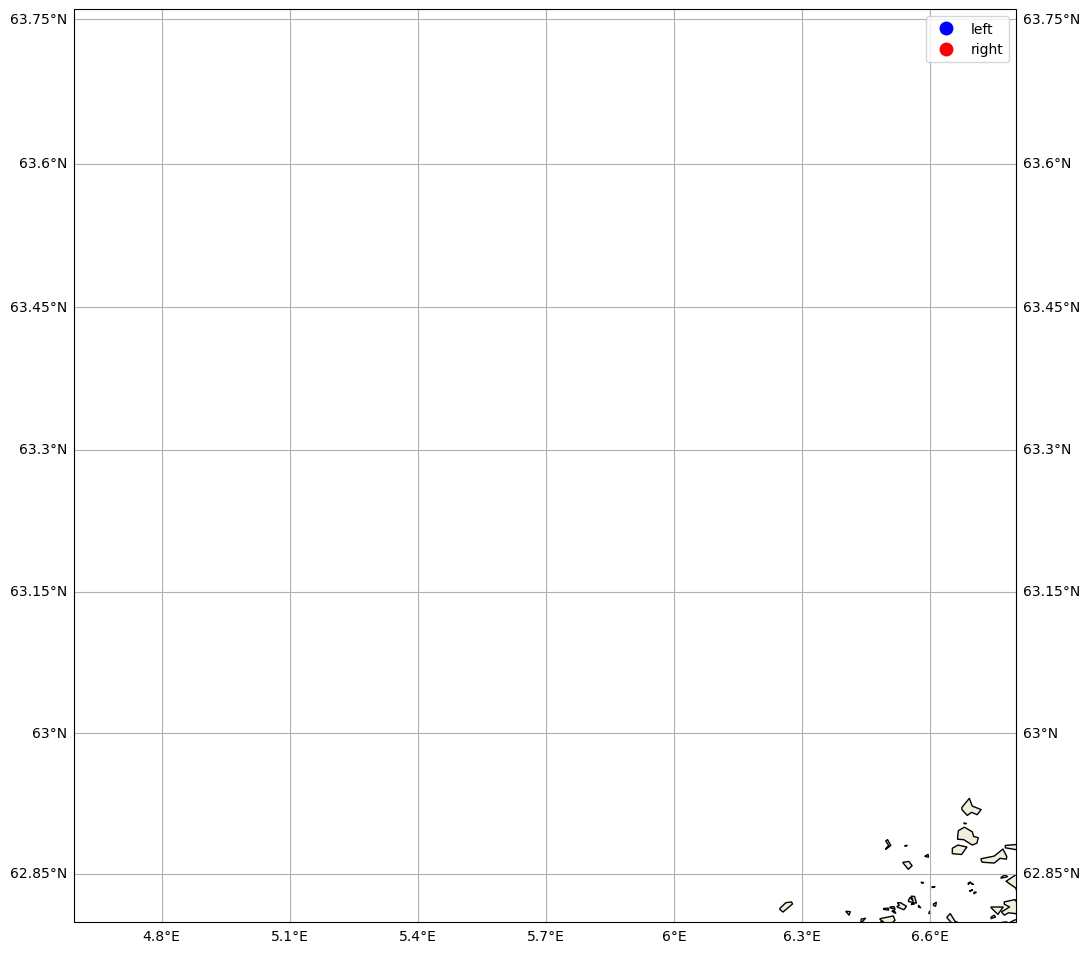

08:52:09 INFO    opendrift.models.basemodel:2996: Time to make animation: 0:00:01.223810


In [6]:
o.add_readers_from_list([
    'https://thredds.met.no/thredds/dodsC/cmems/topaz6/dataset-topaz6-arc-15min-3km-be.ncml',
    'https://thredds.met.no/thredds/dodsC/mepslatest/meps_lagged_6_h_latest_2_5km_latest.nc',
    'https://thredds.met.no/thredds/dodsC/cmems/mywavewam3km/dataset-wam-arctic-1hr3km-be.ncml'
    ])

#%%
# Seed ship elements at defined position and time
# Note: beam/length ratio is larger than allowed, but is then clipped internally
o.seed_elements(lon=5.0, lat=63.0, radius=100, number=100,
                time=datetime.utcnow(),
                length=80.0, beam=20.0, height=9.0, draft=10.0)

#%%
# Running model
o.run(steps=24, stop_on_error=True)

#%%
# Print and plot results
print(o)
o.plot(linecolor='orientation')
#o.animation(color='orientation', markersize=20, filename="orientation.gif", legend=['left','right'],colorbar=False,cmap='bwr')
o.animation(color='orientation', legend=['left','right'], markersize=20, colorbar=False, cmap='bwr')


In [ ]:
o.

In [ ]:
f